# Lab 06: Image Enhancement (Open Ended)
Name: **Raja Hasnain Anwar**<br/>
Registration: **192135**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Loading Image

In [2]:
# Source: https://hellocrybaby.wordpress.com/2013/09/08/day-251-low-contrast/
img = cv2.imread('low-contrast.jpg')

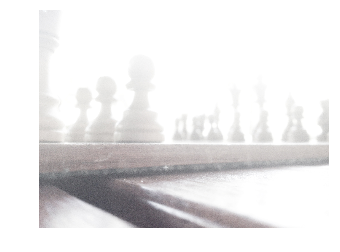

In [3]:
plt.axis('off')
plt.imshow(img[:,:,::-1])
plt.show()

## Original Histogram

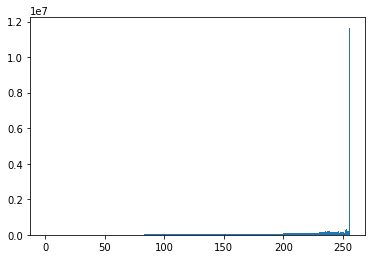

In [5]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

It is obvious that most of (almost all) the pixels are whites especially the top-left quarter. Now, we need to increase the blacks to make the image balanced. Basically, we need to enhance the darker parts of the image to bring back the contrast in the image.

## Solution

We need a technique that will make the image little darker. This leads us to the `power` transform.

After applying power transform, the image shows some signs of blacks as well and the pawns on the left side look very clear and prominent. These changes are achieved without losing the overal texture of the image.

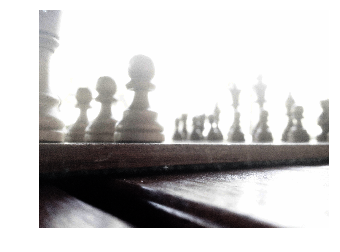

In [6]:
gamma = 4.8
img_pow = np.power(img, gamma)

# re-distributing in [0,255] range
img_pow = np.uint8(cv2.normalize(img_pow, None, 0, 255, cv2.NORM_MINMAX))

plt.axis('off')
plt.imshow(img_pow[:,:,::-1])
plt.show()

Now, we see clear distinction between the pawns and the white background. We are also able to see the browish shade of the table and silverish shade of the pawns.

Histogram equalization does not work in this case, because the white are too many and thus their probability is very high as compared to very little probability of blacks and other grays. This will make the image, binary-like with various distorded regions.

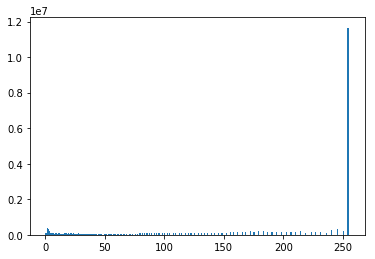

In [7]:
plt.hist(img_pow.ravel(),256,[0,256]); plt.show()

The histogram also shows spikes on gray-levels other than whites; blacks being dominant in these spikes.

## Changing Color Model

Another way to solve the contrast issue is to change the color model of the image and then deal with the colors.

In [8]:
# converting the image to LAB model
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

l, a, b = cv2.split(lab)

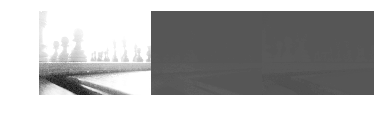

In [9]:
plt.axis('off')
plt.imshow(np.hstack((l,a,b)), cmap='gray')
plt.show()

In [10]:
# applying  CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))
cl = clahe.apply(l)

In [11]:
# Re-stacking the image
limg = cv2.merge((cl,a,b))
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

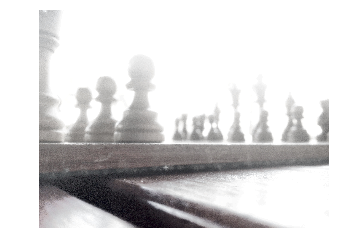

In [12]:
plt.axis('off')
plt.imshow(final[:,:,::-1])
plt.show()

Comparison


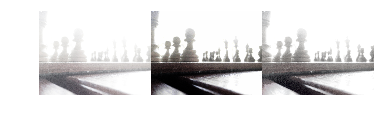

In [13]:
print('Comparison')

plt.axis('off')
plt.imshow(np.hstack((img, img_pow, final))[:,:,::-1])
plt.show()

This technqiue enhances the contrast without disturbing the color distribution that is, it doesn't turn browns to blacks. See the left-bottom where the chess board meets the table.

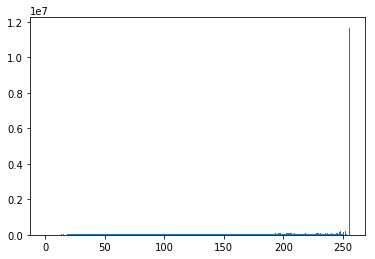

In [14]:
plt.hist(final.ravel(),256,[0,256]); plt.show()

For the same reason, we do not see the darker side, but evenly distributed grays. White is the dominant color in the image, we cannot remove that.<br/>
However, in order to remove the hazy look of the final image, we can merge it with power transform.

## Merger

In [15]:
gamma = 2.5
img_pow = np.power(img, gamma)

# re-distributing in [0,255] range
img_pow = np.uint8(cv2.normalize(img_pow, None, 0, 255, cv2.NORM_MINMAX))


# converting the image to LAB model
lab = cv2.cvtColor(img_pow, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

# applying  CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))
cl = clahe.apply(l)

# Re-stacking the image
limg = cv2.merge((cl,a,b))
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

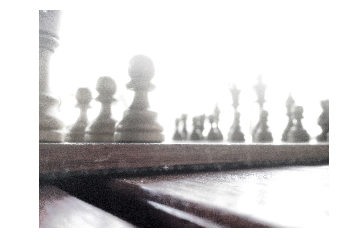

In [16]:
plt.axis('off')
plt.imshow(final[:,:,::-1])
plt.show()

Comparison


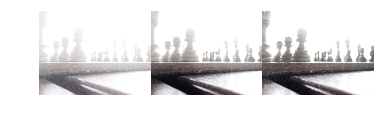

In [17]:
print('Comparison')

plt.axis('off')
plt.imshow(np.hstack((img, img_pow, final))[:,:,::-1])
plt.show()

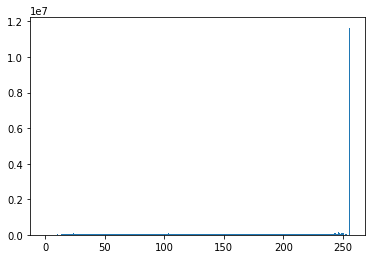

In [18]:
plt.hist(final.ravel(),256,[0,256]); plt.show()